## **Lead Scoring - Case Study**

## Problem Statement

An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying 
customers. The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the 
customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion
chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Our Goals of the Case Study:

1. To build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.
2. The model should be able to adjust if the company's requirement changes in the future so you will need to handle these as well.


### The steps followed are :

- #### Read and understand the data
- #### Clean the data
- #### Prepare the data for Model Building
- #### Model Building
- #### Model Evaluation
- #### Making Predictions on the Test Set

## **IMPORTING THE LIBRARIES**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore') 

## **READING AND UNDERSTANDING THE DATA**

In [2]:
## Let import the dataset 

Lead_Score = pd.read_csv('Leads.csv')
Lead_Score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
## Let check the shape of the dataset 

Lead_Score.shape

(9240, 37)

In [4]:
## Let check the columns with number of rows and datatypes 

Lead_Score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

* **Found that all the columns are stored in the correct format** 

In [5]:
## Let get the columns list 

Lead_Score.columns.tolist()

['Prospect ID',
 'Lead Number',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [6]:
## Let know the statistical features of the dataset 

Lead_Score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## **CLEANING THE DATASET**

In [8]:
## Some columns have rows with Select values which can be treated as null values. Let replace Select values with np.nan 

Lead_Score = Lead_Score.replace('Select',np.nan)

In [9]:
## Let check the columns with number of unique values 

Lead_Score.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [10]:
## Let drop the columns with only one unique value 

Lead_Score.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
               'I agree to pay the amount through cheque'],axis=1,inplace=True)

In [11]:
## Let check the shape of the dataset after dropping the columns 

Lead_Score.shape

(9240, 32)

In [12]:
## Let check the columns with null values 

round(100*(Lead_Score.isnull().mean()),2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
A free cop

In [14]:
## Let drop the columns having more than 40% null values 

columns_to_drop = list(Lead_Score.columns[100*Lead_Score.isnull().mean()>40]) 

Lead_Score.drop(columns_to_drop,axis=1,inplace=True)

In [15]:
## Let check the shape of dataset 

Lead_Score.shape

(9240, 25)

In [16]:
## Let check the columns with null values once again

round(100*(Lead_Score.isnull().mean()),2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Newspaper Article                                 0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Prospect ID                                       0.00
Search                                            0.00
Lead Numbe

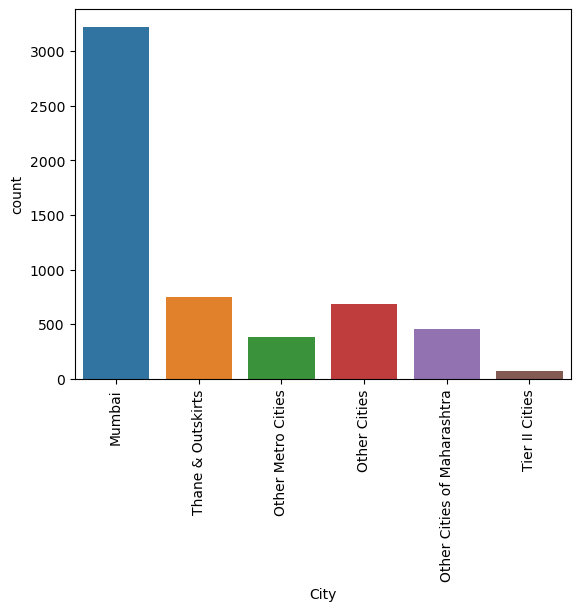

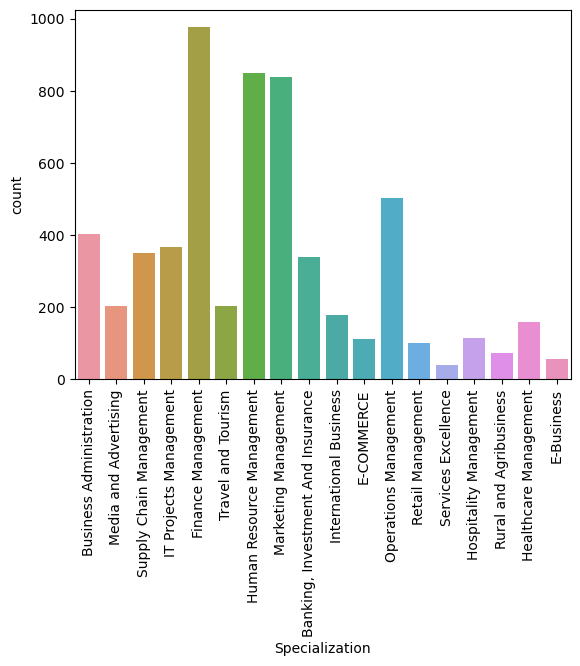

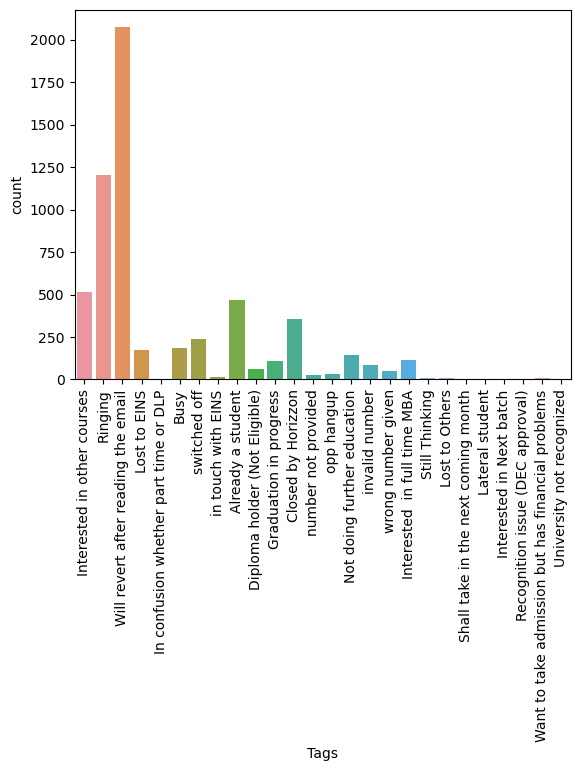

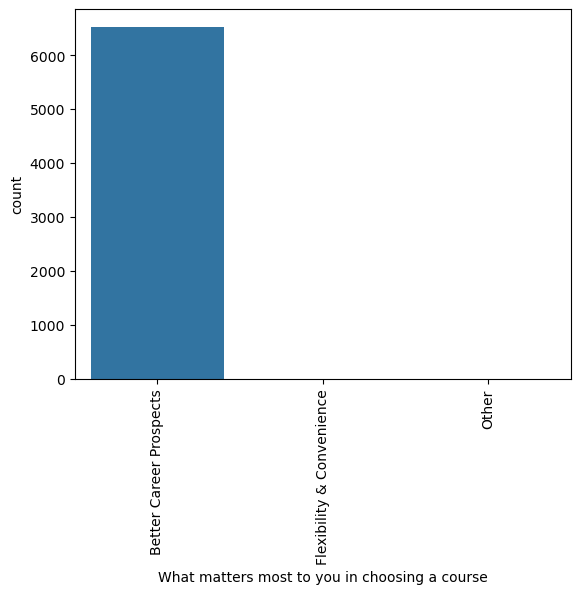

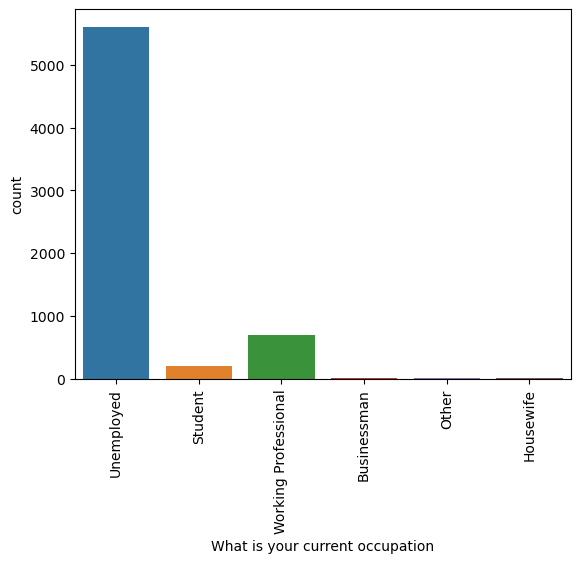

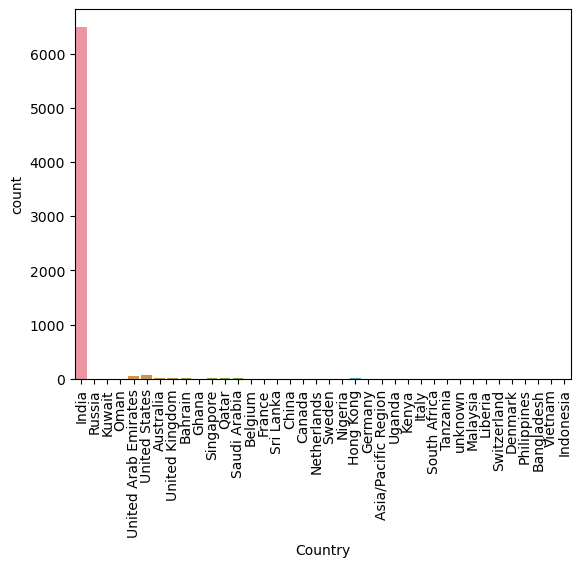

In [17]:
## Let plot countplots for the columns having more null value percentages 

Columns = ['City','Specialization','Tags','What matters most to you in choosing a course','What is your current occupation',
          'Country'] 
for i in Columns : 
    sns.countplot(Lead_Score[i])
    plt.xticks(rotation=90)
    plt.show()

### * From the countplot plotted above, found that 

- Mumbai city occupied more compare to other cities. Hence, impute null values with Mumbai city. 

- Finance Management specialization has occupied more in the specialization. But the column has 36.5% of missing values. It may be possible that the person has not having any specialization or his specialization is not there in the option given. Hence, impute the null value with 'not availavle'

- The Tag column contain the value 'Will revert after reading the email' more. Hence, impute the null value with this value.

- The 'What matters most to you in choosing a course' column is highly skewed due to the presence of Better Career Prospects value. This column thus become unimportant in the analysis. Hence dropping the column. 

- Unemployed value count is more in 'What is your current occupation' column. Hence impute the null value with the Unemployed value. 

- The column Country is highly skewed with the value India. Hence, imputing the null value with the value India.  

In [19]:
Lead_Score['City'] = Lead_Score.City.replace(np.nan,'Mumbai')
Lead_Score['Specialization'] = Lead_Score.Specialization.replace(np.nan,'Not Available')
Lead_Score['Tags'] = Lead_Score.Tags.replace(np.nan,'Will revert after reading the email')
Lead_Score = Lead_Score.drop('What matters most to you in choosing a course',axis=1)
Lead_Score['What is your current occupation'] = Lead_Score['What is your current occupation'].replace(np.nan,'Unemployed')
Lead_Score['Country'] = Lead_Score.Country.replace(np.nan,'India')

In [20]:
## Let drop rows of the remaining columns having null values 

Lead_Score = Lead_Score[~Lead_Score['TotalVisits'].isnull()==True]
Lead_Score = Lead_Score[~Lead_Score['Lead Source'].isnull()==True]

In [21]:
## Lead drop the unwanted Column 

Lead_Score.drop(['Lead Number'],axis=1,inplace=True)

In [22]:
## The Tags column also unuseful in the analysis as it tells the status of the lead. Hence, dropping this column as well. 

Lead_Score.drop('Tags', axis=1, inplace=True)

In [23]:
## Let check the null percentage after null values treatment 

round(100*(Lead_Score.isnull().mean()),2).sort_values(ascending=False)

Prospect ID                               0.0
Lead Origin                               0.0
A free copy of Mastering The Interview    0.0
City                                      0.0
Through Recommendations                   0.0
Digital Advertisement                     0.0
Newspaper                                 0.0
X Education Forums                        0.0
Newspaper Article                         0.0
Search                                    0.0
What is your current occupation           0.0
Specialization                            0.0
Country                                   0.0
Last Activity                             0.0
Page Views Per Visit                      0.0
Total Time Spent on Website               0.0
TotalVisits                               0.0
Converted                                 0.0
Do Not Call                               0.0
Do Not Email                              0.0
Lead Source                               0.0
Last Notable Activity             

In [24]:
## Let check the shape of the dataset 

Lead_Score.shape

(9074, 22)

## **UNIVARIATE AND BIVARIATE ANALYSIS**

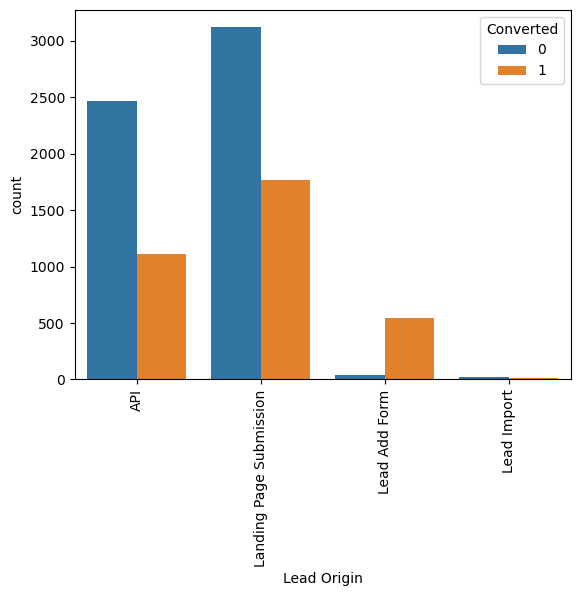

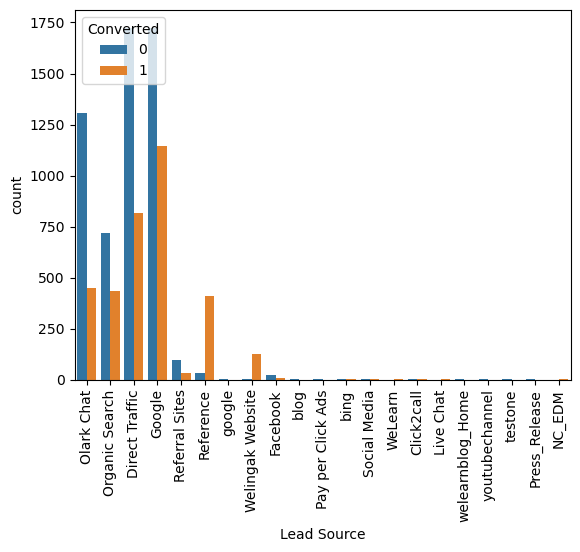

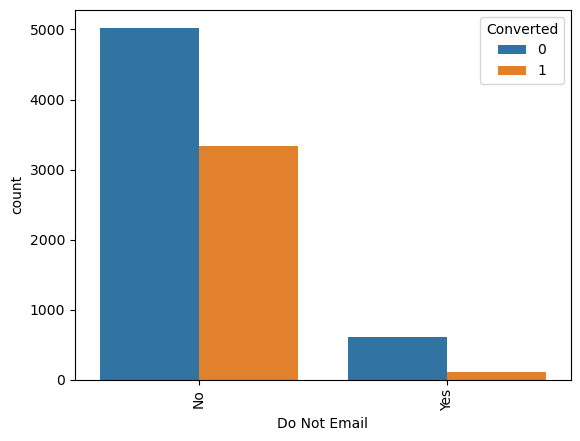

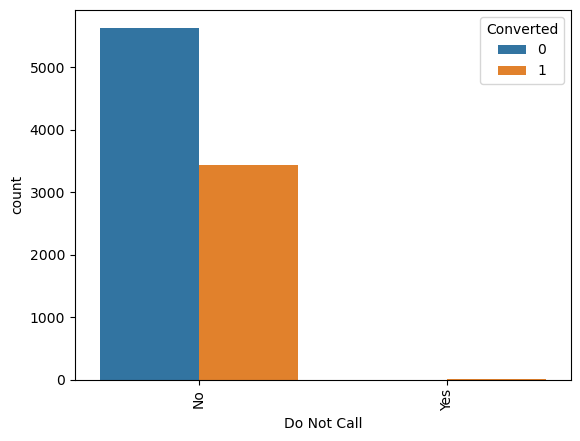

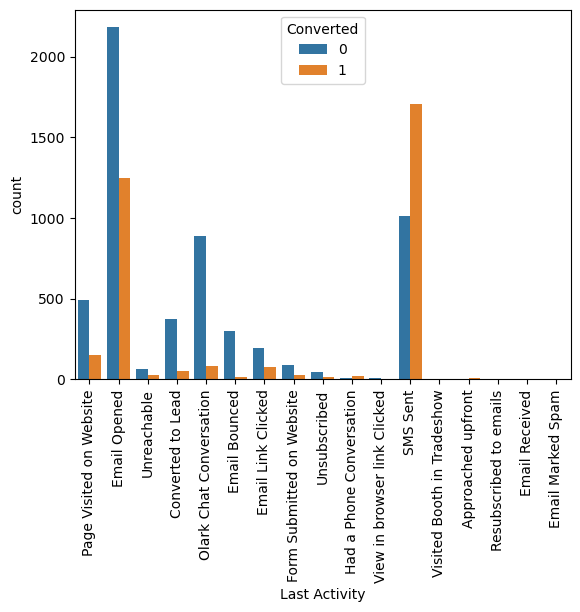

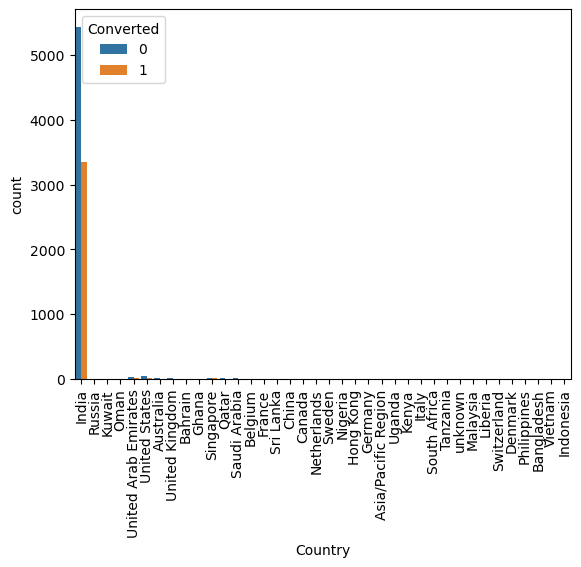

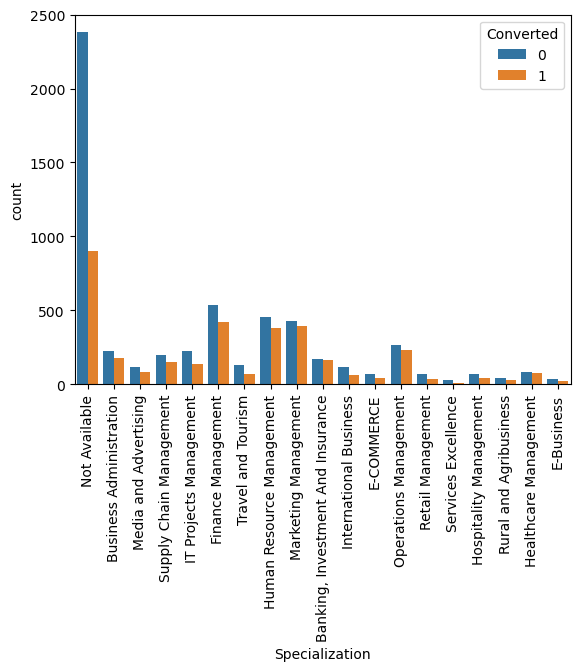

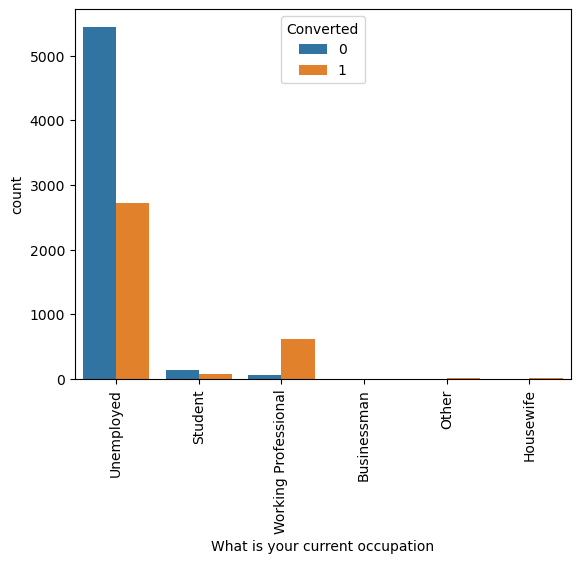

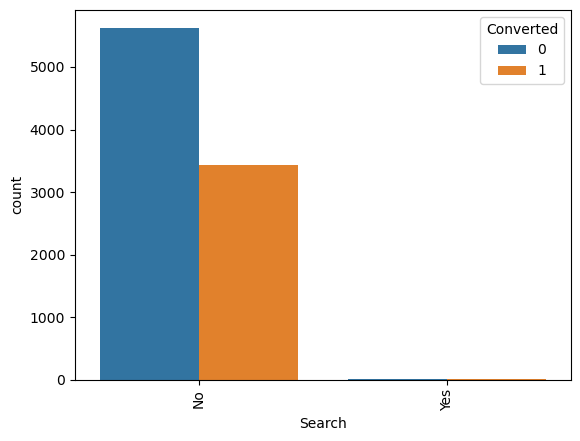

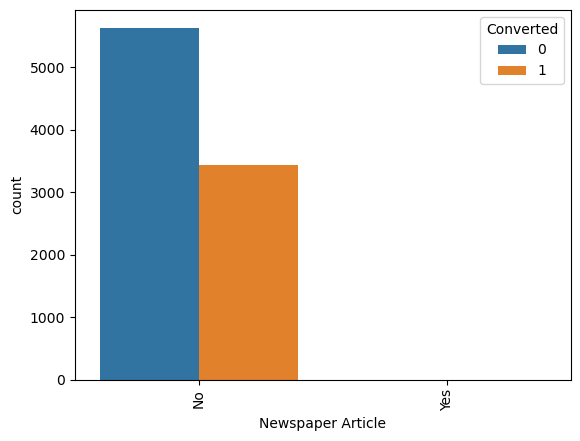

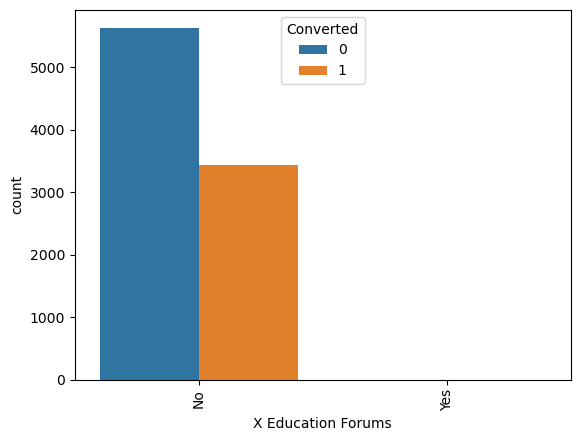

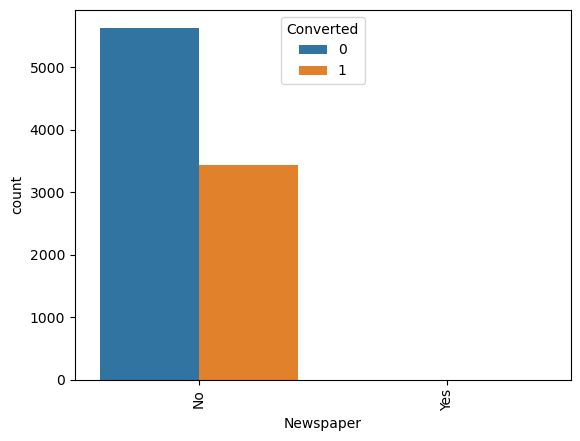

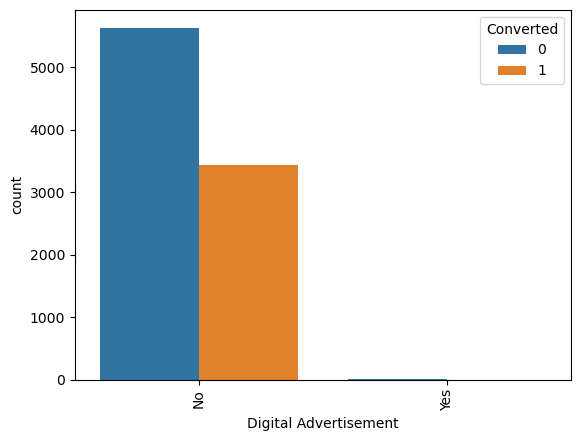

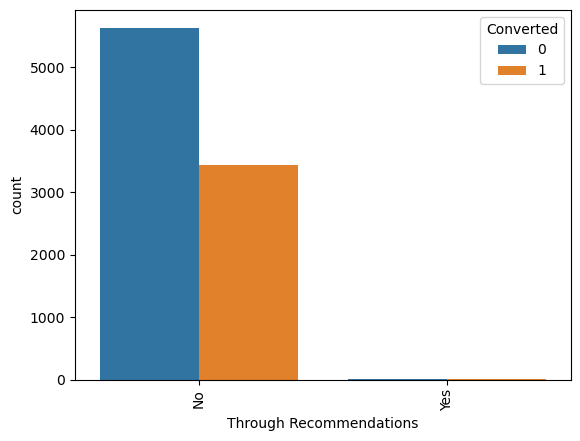

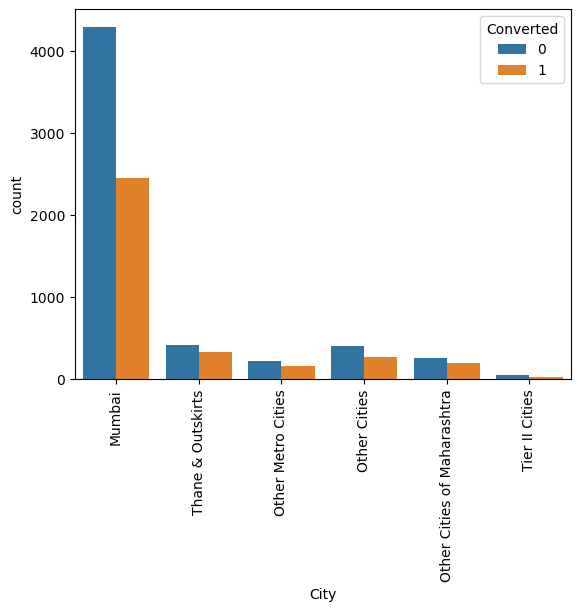

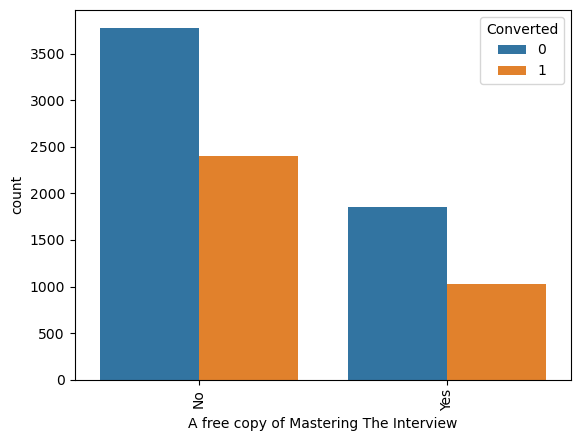

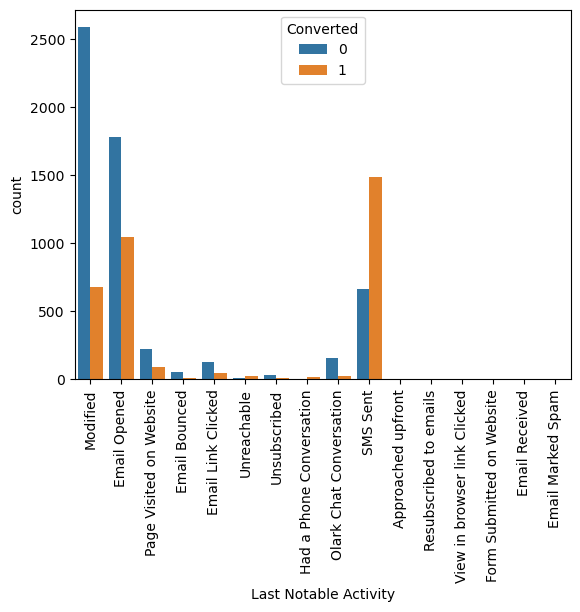

In [391]:
## Let draw the countplot to get to know about the count of values in each categorical columns with respect to the target variable 
## 'Converted'

Categorical_Columns = ['Lead Origin','Lead Source','Do Not Email','Do Not Call','Last Activity','Country','Specialization',
                      'What is your current occupation','Search','Newspaper Article','X Education Forums','Newspaper',
                      'Digital Advertisement','Through Recommendations','City','A free copy of Mastering The Interview',
                      'Last Notable Activity']

for j in Categorical_Columns : 
    sns.countplot(Lead_Data[j],hue=Lead_Data['Converted'])
    plt.xticks(rotation=90)
    plt.show()

In [25]:
## The column Lead Source has value google which is stored as 2 separate value. Let group it as Google. 

Lead_Score['Lead Source'] = Lead_Score['Lead Source'].replace('google', 'Google')

In [26]:
## Some data values are stored in very less number in the columns Lead Source, Last Activity, Country, What is your current occupation,
## Tags, Last Notable Activity. Let group such values into one category called 'Others'


Lead_Score['Lead Source'] = Lead_Score['Lead Source'].replace(['blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn',
       'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel','testone', 'Press_Release', 'NC_EDM'],'Other Source')

Lead_Score['Last Activity'] = Lead_Score['Last Activity'].replace(['View in browser link Clicked','Visited Booth in Tradeshow', 'Approached upfront',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam','Had a Phone Conversation'],'Other Activity')

Lead_Score['What is your current occupation'] = Lead_Score['What is your current occupation'].replace(['Businessman', 'Other', 
       'Housewife'],'Other Occupation')

Lead_Score['Last Notable Activity'] = Lead_Score['Last Notable Activity'].replace(['Had a Phone Conversation', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked','Form Submitted on Website', 'Email Received', 'Email Marked Spam'],'Other Notable Activity')


## ***Inferences From the Countplots plotted above***

1) **LEAD ORIGIN** 
- The API and Land Page Submission have less converted counts. Need to focus on improving the conversion. 
- Lead Add form has more conversion but less in number. 

2) **LEAD SOURCE** 
- Olark Chat, Organic Search, Direct Traffic, Google have less conversion rate. Need to focus on improving of mentioned datas.
- Referal Sites,  Welingak Website have high conversion.

3) **LAST ACTIVITY** 
- Leads with SMS sent has more converision rates. 
- Most of the leads have kept their email opened. 

4) **COUNTRY** 
- No inferences to be made as this column is highly skewed by the data value India. 

5) **Specialization** 
- Almost all of the specialization have both converted and not converted leads. Hence focus to be made more on converting the leads in specialization category. 

6) **What is your Current Occupation** 
- Professional have high conversion rate. 
- Need to have high focus on convertion of Unemployed people. 

7) **City** 
- Need to have focus on people from all the cities to improve the converted rate. 

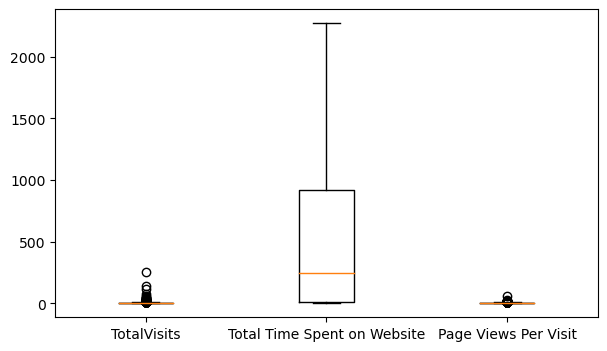

In [27]:
## Let draw the boxplot for the numerical variables

Continuous_Columns = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit'] 

plt.figure(figsize=[7,4])

plt.boxplot([Lead_Score['TotalVisits'],Lead_Score['Total Time Spent on Website'],Lead_Score['Page Views Per Visit']])
plt.xticks((1,2,3),['TotalVisits','Total Time Spent on Website','Page Views Per Visit'])
plt.show()

In [28]:
## From the boxplot plotted above, found that the columns TotalVisits and Page Views Per Visit have outliers.
## Let treat the outliers. 

Lead_Score['TotalVisits'].quantile([0.25,0.5,0.75,0.9,0.99,1])

0.25      1.0
0.50      3.0
0.75      5.0
0.90      7.0
0.99     17.0
1.00    251.0
Name: TotalVisits, dtype: float64

In [29]:
q1 = 1.0 
q2 = 3.0
q3 = 5.0
iqr = q3-q1
ub = q3+1.5*iqr
lb = q1-1.5*iqr
Lead_Score['TotalVisits']=np.where(Lead_Score['TotalVisits']>ub,ub,Lead_Score['TotalVisits'])
Lead_Score['TotalVisits']=np.where(Lead_Score['TotalVisits']<lb,lb,Lead_Score['TotalVisits'])

In [30]:
Lead_Score['Page Views Per Visit'].quantile([0.25,0.5,0.75,0.9,0.99,1])

0.25     1.0
0.50     2.0
0.75     3.2
0.90     5.0
0.99     9.0
1.00    55.0
Name: Page Views Per Visit, dtype: float64

In [31]:
q1 = 1.0 
q2 = 2.0
q3 = 3.2
iqr = q3-q1
ub = q3+1.5*iqr
lb = q1-1.5*iqr
Lead_Score['Page Views Per Visit']=np.where(Lead_Score['Page Views Per Visit']>ub,ub,Lead_Score['Page Views Per Visit'])
Lead_Score['Page Views Per Visit']=np.where(Lead_Score['Page Views Per Visit']<lb,lb,Lead_Score['Page Views Per Visit'])

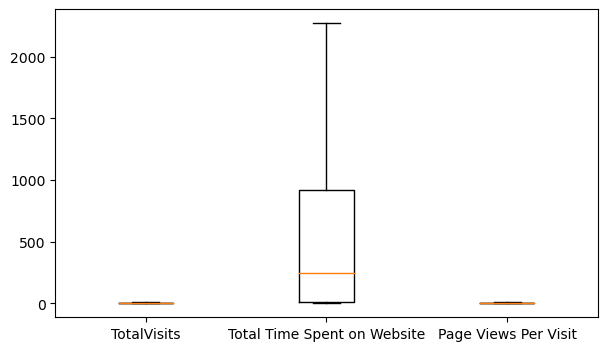

In [32]:
## Let draw the boxplot once again after outlier treatment 

plt.figure(figsize=[7,4])

plt.boxplot([Lead_Score['TotalVisits'],Lead_Score['Total Time Spent on Website'],Lead_Score['Page Views Per Visit']])
plt.xticks((1,2,3),['TotalVisits','Total Time Spent on Website','Page Views Per Visit'])
plt.show()

### **Cleared that there is no outliers present in the numerical columns**

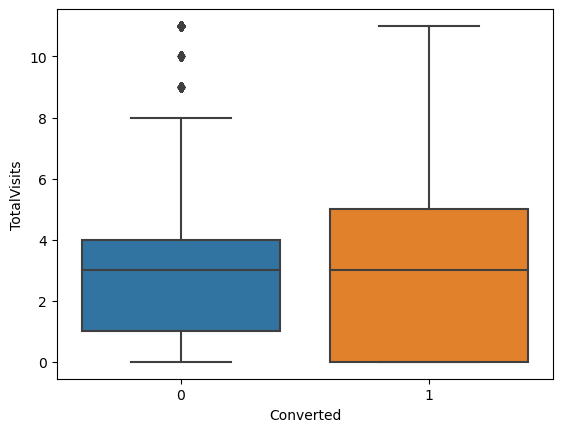

In [33]:
## Let draw the boxplot of numerical columns with the target column 'Converted' 

sns.boxplot(Lead_Score['Converted'],Lead_Score['TotalVisits'])
plt.show()

### *Found that the median value for both converted and not converted is same.*

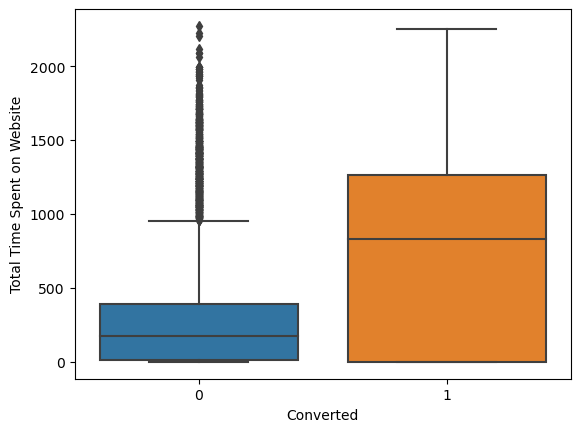

In [34]:
sns.boxplot(Lead_Score['Converted'],Lead_Score['Total Time Spent on Website'])
plt.show()

### *It is cleared that the leads spend more time on website are more likely to be converted.*

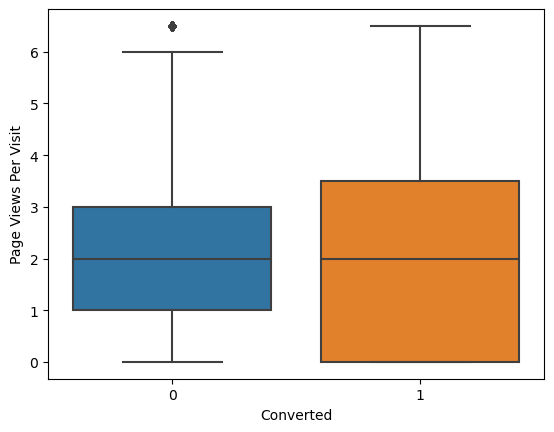

In [35]:
sns.boxplot(Lead_Score['Converted'],Lead_Score['Page Views Per Visit'])
plt.show()

### *Found that the median value for both converted and not converted is same.*

In [36]:
## Some columns have found out unimportant in building the model after univariate analysis. 
## Let remove all those columns from the dataset. 

Unwanted_Columns = ['Search','Newspaper Article','X Education Forums','Newspaper', 'Country', 'Digital Advertisement','Through Recommendations']

Lead_Score.drop(Unwanted_Columns,axis=1,inplace=True)

In [37]:
## Let check the final shape of the dataset 

Lead_Score.shape

(9074, 15)

# *DATA PREPARATION*

### **Converting binary variables (Yes/No) to 0/1**

In [38]:
binary_variables = ['Do Not Email','Do Not Call','A free copy of Mastering The Interview']

## Defining the map function 

def binary_map(x):
    return x.map({'Yes':1, 'No':0})

## Applying the Function

Lead_Score[binary_variables] = Lead_Score[binary_variables].apply(binary_map)

Lead_Score.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Not Available,Unemployed,Mumbai,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Not Available,Unemployed,Mumbai,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Not Available,Unemployed,Mumbai,0,Modified


###  For Categorical variables with multiple levels, create dummy features (one-hot encoded)

In [39]:
## Creating a dummy variable for some of the categorical variables and dropping the first one. 

dummy1 = pd.get_dummies(Lead_Score[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 
                                   'City', 'Last Notable Activity']], drop_first=True)

## Adding the results to the master dataframe 

Lead_Score = pd.concat([Lead_Score, dummy1], axis=1)

In [40]:
## Dropping the columns which helped to create the dummy columns 

Lead_Score.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'City', 
                'Last Notable Activity'], axis=1,inplace=True)

Lead_Score.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Notable Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


## *TEST-TRAIN SPLIT*

In [41]:
import sklearn 
from sklearn.model_selection import train_test_split 

## Putting Feature Variable to X 

X = Lead_Score.drop(['Converted','Prospect ID'], axis=1)

## Putting response variable to y 

y = Lead_Score['Converted']

## Splitting the data into train and test 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 100)

## *FEATURE SCALING*

In [42]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler() 

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Notable Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3009,0,0,-0.431325,-0.160255,-0.161929,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1012,1,0,-0.431325,-0.540048,-0.161929,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.124566,-0.888650,-1.247280,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4750,0,0,-0.431325,1.643304,-0.161929,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7987,0,0,0.608537,2.017593,0.109409,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [43]:
## Checking the Converted Rate 

Converted = round(100*Lead_Score.Converted.sum()/9074,2)
Converted

37.86

#### **We have almost 37.86% converted rate**

## *FEATURE SELECTION USING RFE*

In [44]:
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression() 

In [45]:
from sklearn.feature_selection import RFE 
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [46]:
rfe.support_

array([ True, False, False,  True, False, False,  True,  True, False,
       False, False,  True, False, False,  True, False,  True, False,
       False, False, False,  True,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False,  True,  True, False])

In [47]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 9),
 ('TotalVisits', False, 23),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('A free copy of Mastering The Interview', False, 20),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Source_Facebook', False, 29),
 ('Lead Source_Google', False, 30),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 41),
 ('Lead Source_Other Source', False, 31),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 33),
 ('Last Activity_Email Link Clicked', False, 17),
 ('Last Activity_Email Opened', False, 10),
 ('Last Activity_Form Submitted on Website', False, 34),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other Activity', True, 1),
 ('Last Activity_Page Visited 

In [50]:
## Let view the columns selected by RFE 

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Activity', 'Last Activity_Unsubscribed',
       'Specialization_Not Available',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Other Notable Activity',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

## *Accessing the model with StatsModels*

In [51]:
import statsmodels 
import statsmodels.api as sm 

## Let draw the model-1

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res  = logm2.fit() 
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2616.9
Date:                Sat, 14 Oct 2023   Deviance:                       5233.8
Time:                        10:12:50   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3989
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3273      0.122     -2.678      0.007      -0.567      -0.088
Do Not Email                                            -1.7772      0.187     -9.488      0.000      -2.144      -1.410
Total Time Spent on Website                              1.0985      0.040     27.363      0.000       1.020       1.177
Lead Origin_Landing Page Submission                     -1.1649      0.127     -9.166      0.000      -1.414      -0.916
Lead Origin_Lead Add Form                                1.4481      0.895      1.618      0.106      -0.306       3.202
Lead Source_Olark Chat                                   1.1432      0.122      9.355      0.000       0.904       1.383
Lead Source_Reference                                    1.9614      0.919      2.135      0.033       0.161       3.762
Lead Source_Welingak Website                             4.6151      1.153      4.001      0.000       2.354       6.876
Last Activity_Olark Chat Conversation                   -1.3972      0.165     -8.476      0.000      -1.720      -1.074
Last Activity_Other Activity                             1.3608      0.582      2.340      0.019       0.221       2.501
Last Activity_Unsubscribed                               1.5136      0.472      3.209      0.001       0.589       2.438
Specialization_Not Available                            -1.1908      0.125     -9.556      0.000      -1.435      -0.947
What is your current occupation_Working Professional     2.5884      0.193     13.435      0.000       2.211       2.966
Last Notable Activity_Other Notable Activity             1.3565      0.875      1.551      0.121      -0.358       3.071
Last Notable Activity_SMS Sent                           1.6602      0.080     20.727      0.000       1.503       1.817
Last Notable Activity_Unreachable                        1.7837      0.474      3.766      0.000       0.856       2.712
========================================================================================================================
"""

In [52]:
## The p-value of Last Notable Activity_Other Notable Activity is more. Hence, dropping this column. 

col = col.drop('Last Notable Activity_Other Notable Activity')

In [53]:
## Let draw the model-2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res  = logm2.fit() 
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2618.1
Date:                Sat, 14 Oct 2023   Deviance:                       5236.2
Time:                        10:12:59   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3986
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3226      0.122     -2.641      0.008      -0.562      -0.083
Do Not Email                                            -1.7746      0.187     -9.502      0.000      -2.141      -1.409
Total Time Spent on Website                              1.0977      0.040     27.363      0.000       1.019       1.176
Lead Origin_Landing Page Submission                     -1.1674      0.127     -9.191      0.000      -1.416      -0.918
Lead Origin_Lead Add Form                                1.4462      0.895      1.616      0.106      -0.307       3.200
Lead Source_Olark Chat                                   1.1429      0.122      9.352      0.000       0.903       1.382
Lead Source_Reference                                    1.9645      0.919      2.139      0.032       0.164       3.765
Lead Source_Welingak Website                             4.6187      1.153      4.004      0.000       2.358       6.879
Last Activity_Olark Chat Conversation                   -1.3956      0.165     -8.466      0.000      -1.719      -1.072
Last Activity_Other Activity                             1.9602      0.452      4.340      0.000       1.075       2.845
Last Activity_Unsubscribed                               1.5108      0.471      3.204      0.001       0.587       2.435
Specialization_Not Available                            -1.1987      0.125     -9.624      0.000      -1.443      -0.955
What is your current occupation_Working Professional     2.5826      0.193     13.415      0.000       2.205       2.960
Last Notable Activity_SMS Sent                           1.6597      0.080     20.722      0.000       1.503       1.817
Last Notable Activity_Unreachable                        1.7828      0.474      3.765      0.000       0.855       2.711
========================================================================================================================
"""

In [54]:
## The p-value of Lead Origin_Lead Add Form is more. Hence, dropping this column. 

col = col.drop('Lead Origin_Lead Add Form')

In [55]:
## Let draw the model-3

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res  = logm2.fit() 
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2619.5
Date:                Sat, 14 Oct 2023   Deviance:                       5239.1
Time:                        10:13:07   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3984
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3041      0.122     -2.500      0.012      -0.543      -0.066
Do Not Email                                            -1.7763      0.187     -9.511      0.000      -2.142      -1.410
Total Time Spent on Website                              1.0957      0.040     27.352      0.000       1.017       1.174
Lead Origin_Landing Page Submission                     -1.1848      0.127     -9.354      0.000      -1.433      -0.937
Lead Source_Olark Chat                                   1.1361      0.122      9.314      0.000       0.897       1.375
Lead Source_Reference                                    3.3967      0.242     14.041      0.000       2.923       3.871
Lead Source_Welingak Website                             6.0565      0.735      8.246      0.000       4.617       7.496
Last Activity_Olark Chat Conversation                   -1.3993      0.165     -8.489      0.000      -1.722      -1.076
Last Activity_Other Activity                             1.9566      0.452      4.333      0.000       1.072       2.842
Last Activity_Unsubscribed                               1.5099      0.471      3.203      0.001       0.586       2.434
Specialization_Not Available                            -1.2105      0.124     -9.730      0.000      -1.454      -0.967
What is your current occupation_Working Professional     2.5797      0.193     13.396      0.000       2.202       2.957
Last Notable Activity_SMS Sent                           1.6608      0.080     20.737      0.000       1.504       1.818
Last Notable Activity_Unreachable                        1.7790      0.474      3.757      0.000       0.851       2.707
========================================================================================================================
"""

### *The p-value found less than 0.05. Let check for the VIF value*

In [56]:
# Let know the VIF value 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,Lead Source_Olark Chat,2.04
9,Specialization_Not Available,1.95
6,Last Activity_Olark Chat Conversation,1.44
11,Last Notable Activity_SMS Sent,1.42
2,Lead Origin_Landing Page Submission,1.35
1,Total Time Spent on Website,1.30
4,Lead Source_Reference,1.22
10,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.18
5,Lead Source_Welingak Website,1.09


### *The VIF value for all the 13 variables are found low*

In [57]:
## Getting the predicted values on the train set  

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.159152
1012    0.076722
9226    0.205522
4750    0.877869
7987    0.672975
1281    0.764287
2880    0.079103
4971    0.969013
7536    0.819613
1248    0.633387
dtype: float64

In [58]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.15915236, 0.07672204, 0.2055224 , 0.87786949, 0.67297487,
       0.76428749, 0.07910324, 0.96901265, 0.81961288, 0.63338712])

## *Creating a dataframe with the actual Converted flag and the predicted probabilities*

In [59]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.159152,3009
1,0,0.076722,1012
2,0,0.205522,9226
3,1,0.877869,4750
4,1,0.672975,7987


### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0 

In [60]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x>0.5 else 0)

## Let's see the head 

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.159152,3009,0
1,0,0.076722,1012,0
2,0,0.205522,9226,0
3,1,0.877869,4750,1
4,1,0.672975,7987,1


## *CONFUSION MATRIX*

In [61]:
from sklearn import metrics 

confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
print(confusion)

[[3447  458]
 [ 734 1712]]


In [62]:
## Let's check the overall accuracy 

print(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted']))

0.8123130215714061


## *SENSITIVITY AND SPECIFICITY CALCULATION*

In [63]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]

In [64]:
Sensitivity = TP / float(TP+FN) 

Specificity = TN / float(TN+FP) 

False_Positive_Rate = FP/ float(TN+FP) 

Positive_Predictive_Value = TP / float(TP+FP) 

Negative_predictive_value = TN / float(TN+ FN) 

print(Sensitivity)
print(Specificity)
print(False_Positive_Rate)
print(Positive_Predictive_Value)
print(Negative_predictive_value)

0.6999182338511856
0.8827144686299616
0.11728553137003841
0.7889400921658987
0.8244439129394882


#### Observed that the Sensitivity value that we have got is low where as specificity value is high. The less sensitivity value is because of randomlychosen cut-off value. To optimize the cut-off value, let go for plotting the ROC curve.*



## *PLOTTING THE ROC CURVE*

In [65]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [66]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'], drop_intermediate = False )

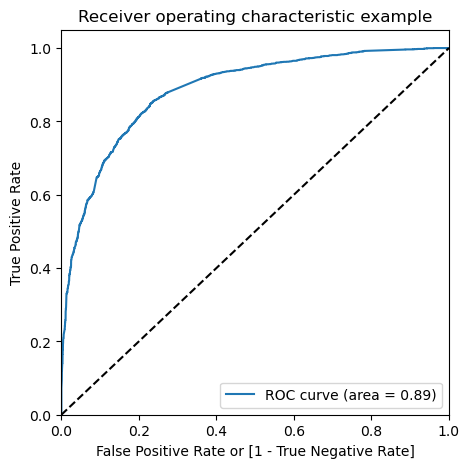

In [67]:
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

## *FINDING OPTIMAL CUT-OFF POINT*

In [68]:
## Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.159152,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.076722,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.205522,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.877869,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.672975,7987,1,1,1,1,1,1,1,1,0,0,0


In [69]:
## Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.385136     1.000000     0.000000
0.1   0.1  0.603212     0.969747     0.373624
0.2   0.2  0.746024     0.917416     0.638668
0.3   0.3  0.800031     0.849550     0.769014
0.4   0.4  0.807117     0.773508     0.828169
0.5   0.5  0.812313     0.699918     0.882714
0.6   0.6  0.797512     0.592805     0.925736
0.7   0.7  0.785388     0.520033     0.951601
0.8   0.8  0.765076     0.435405     0.971575
0.9   0.9  0.716895     0.282911     0.988732


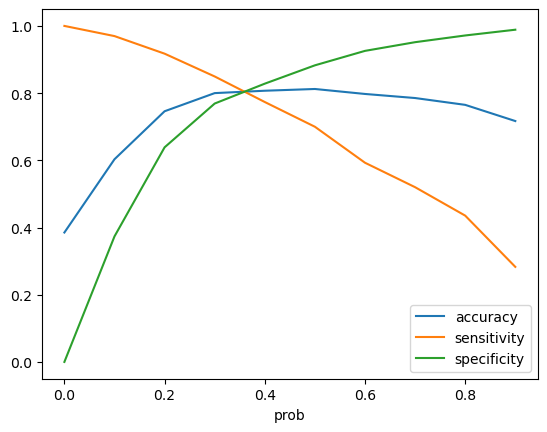

In [70]:
## Let's plot accuracy, sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

### *From the ROC curve, the optimal cut-off point is 0.36*

In [71]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.36 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.159152,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.076722,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.205522,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.877869,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.672975,7987,1,1,1,1,1,1,1,1,0,0,0,1


## *Assigning the Lead Score to the Training Data*

In [72]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted,Lead_Score
0,0,0.159152,3009,0,1,1,0,0,0,0,0,0,0,0,0,16
1,0,0.076722,1012,0,1,0,0,0,0,0,0,0,0,0,0,8
2,0,0.205522,9226,0,1,1,1,0,0,0,0,0,0,0,0,21
3,1,0.877869,4750,1,1,1,1,1,1,1,1,1,1,0,1,88
4,1,0.672975,7987,1,1,1,1,1,1,1,1,0,0,0,1,67


## *MODEL EVALUATION*

In [73]:
## Let's check the overall accuracy 

print(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Final_Predicted']))

0.8061722563375846


In [74]:
## Confusion Matrix 

confusion_1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Final_Predicted'])
print(confusion_1)

[[3146  759]
 [ 472 1974]]


In [75]:
TP = confusion_1[1,1] 
TN = confusion_1[0,0] 
FP = confusion_1[0,1] 
FN = confusion_1[1,0]

In [76]:
Sensitivity = TP / float(TP+FN) 

Specificity = TN / float(TN+FP) 

False_Positive_Rate = FP/ float(TN+FP) 

Positive_Predictive_Value = TP / float(TP+FP) 

Negative_predictive_value = TN / float(TN+ FN) 

print(Sensitivity)
print(Specificity)
print(False_Positive_Rate)
print(Positive_Predictive_Value)
print(Negative_predictive_value)

0.8070318887980377
0.8056338028169014
0.19436619718309858
0.7222832052689352
0.8695411829740188


#### *The Sensitivity value observed as 80.7% and Specificity value observed as 80.56%.*

## *PRECISION AND RECALL*

In [77]:
Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

print(Precision)
print(Recall)

0.7222832052689352
0.8070318887980377


## *Precision and Recall Tradeoff*

In [78]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [79]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

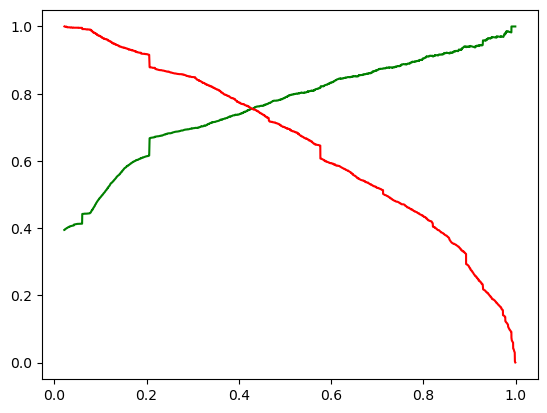

In [80]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## *MAKING PREDICTION ON THE TEST SET*

In [81]:
## Scaling the Test Data 

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [82]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Unsubscribed,Specialization_Not Available,What is your current occupation_Working Professional,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
3271,0,-0.600595,0,0,0,0,0,0,0,1,0,0,0
1490,0,1.887326,1,0,0,0,0,0,0,0,1,0,0
7936,0,-0.752879,0,0,0,0,0,0,0,1,0,0,0
4216,0,-0.888650,0,0,1,0,0,0,0,0,0,0,0
3830,0,-0.587751,1,0,0,0,0,0,0,0,0,0,0


In [83]:
X_test_sm = sm.add_constant(X_test)

## Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.102233
1490    0.959246
7936    0.087904
4216    0.892723
3830    0.105936
1800    0.567046
6507    0.367613
4821    0.251314
4223    0.928855
4714    0.205522
dtype: float64

In [84]:
## Converting y_test_pred to a dataframe which is an array

y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
3271,0.102233
1490,0.959246
7936,0.087904
4216,0.892723
3830,0.105936


In [85]:
## Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

## Putting Prospect Id to DataFrame
y_test_df['Prospect Id'] = y_test_df.index

## Removing index for both dataframes to append them side by side 
y_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

## Appending y_test_df and y_pred
y_pred_final = pd.concat([y_test_df, y_pred],axis=1)

y_pred_final.head()

,Converted,Prospect Id,0
0,0,3271,0.102233
1,1,1490,0.959246
2,0,7936,0.087904
3,1,4216,0.892723
4,0,3830,0.105936


In [86]:
## Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

y_pred_final.head()

,Converted,Prospect Id,Converted_Prob
0,0,3271,0.102233
1,1,1490,0.959246
2,0,7936,0.087904
3,1,4216,0.892723
4,0,3830,0.105936


In [87]:
y_pred_final['Final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.36 else 0)

y_pred_final.head()

,Converted,Prospect Id,Converted_Prob,Final_Predicted
0,0,3271,0.102233,0
1,1,1490,0.959246,1
2,0,7936,0.087904,0
3,1,4216,0.892723,1
4,0,3830,0.105936,0


In [88]:
## Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.803892765332354

In [89]:
##  Making the confusion matrix

confusion_2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted )
confusion_2

array([[1392,  342],
       [ 192,  797]], dtype=int64)

In [90]:
TP = confusion_2[1,1]  
TN = confusion_2[0,0] 
FP = confusion_2[0,1] 
FN = confusion_2[1,0] 

In [91]:
Sensitivity = TP / float(TP+FN) 

Specificity = TN / float(TN+FP) 

print(Sensitivity)
print(Specificity)


0.8058645096056622
0.8027681660899654


## *Assigning the Lead Score*

In [92]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_pred_final.head()

,Converted,Prospect Id,Converted_Prob,Final_Predicted,Lead_Score
0,0,3271,0.102233,0,10
1,1,1490,0.959246,1,96
2,0,7936,0.087904,0,9
3,1,4216,0.892723,1,89
4,0,3830,0.105936,0,11


### *Comparing the values obtained for Train and Test Data* 

### *Train Data:* 

- *Accuracy : 80.61%* 
- *Specificity : 80.56%* 
- *Sensitivity : 80.7%* 
    
### *Test Data* 

- *Accuracy : 80.38%* 
- *Specificity : 80.27%* 
- *Sensitivity : 80.58%*

## *CONCLUSION*

- The accuracy for both Train as well as Test Data found almost similar. 
- The model is able to give higher conversion rate of around 80%. 
- We can make a decision on getting higher conversion rate based on the model that we have built. 


## *FINDING OUT THE LEADS TO BE CONTACTED*

In [95]:
## The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. 
## They can be termed as 'Hot Leads'.

Hot_Leads=y_pred_final[y_pred_final['Lead_Score']>=85]
Hot_Leads

,Converted,Prospect Id,Converted_Prob,Final_Predicted,Lead_Score
1,1,1490,0.959246,1,96
3,1,4216,0.892723,1,89
8,1,4223,0.928855,1,93
16,1,1946,0.934564,1,93
21,1,2461,0.994670,1,99
...,...,...,...,...,...
2694,1,1566,0.931617,1,93
2699,1,6461,0.965111,1,97
2703,1,5741,0.917026,1,92
2715,1,6299,0.881958,1,88


#### *There are 382 Hot Leads to be contacted to have higher conversion rate.*

In [97]:
## Let find out the prospect id of the contact leads 

Hot_Leads_Ids = Hot_Leads['Prospect Id'].values.reshape(-1)
Hot_Leads_Ids

array([1490, 4216, 4223, 1946, 2461, 5822, 2684, 4959, 2010, 4062, 7696,
       9049, 4543, 4830, 4365, 3542, 2504, 7674, 8596, 4003, 4963, 6947,
       4807,  446,  789, 8372, 5805, 3758, 1561,  737, 9034, 6423, 8286,
       7174, 4461, 1436, 7552, 3932, 4080, 1475, 5785, 2860, 7253, 4297,
       5490, 1995, 6532, 4498, 5797, 8687,  831, 7653, 4149, 2018,  243,
       6743, 3307, 3976, 5769, 1663, 3288, 8959, 7521, 8282, 8213, 9063,
       5292, 6913, 6015, 1481,  785, 3265, 3285, 7433, 2460, 3858, 2009,
       8106,  373, 3055, 7417, 4179, 8076, 8568, 7268, 4353, 6784, 6754,
       7236, 2960, 3983,  802, 8745, 4717,  505, 8509, 6094, 4992, 7036,
       2680, 7065,  112, 6149, 7157, 3827, 7175, 1675, 6999, 5826, 8492,
       6499, 2481, 3439, 4612, 7129, 4793, 4837, 2495,  822, 8111, 2378,
       5090, 5075, 7699, 5638, 2342, 8077, 2727,  720, 7489, 2961, 1542,
       5656, 2630, 6728, 8205, 6332, 8461, 2427, 5087,  174, 2674, 8065,
       2095, 1568, 8597, 4865, 3535, 4708, 1304, 60

In [98]:
## Let find out the important features from the built model 

res.params.sort_values(ascending=False)

Lead Source_Welingak Website                            6.056490
Lead Source_Reference                                   3.396663
What is your current occupation_Working Professional    2.579663
Last Activity_Other Activity                            1.956558
Last Notable Activity_Unreachable                       1.778964
Last Notable Activity_SMS Sent                          1.660837
Last Activity_Unsubscribed                              1.509878
Lead Source_Olark Chat                                  1.136138
Total Time Spent on Website                             1.095678
const                                                  -0.304132
Lead Origin_Landing Page Submission                    -1.184829
Specialization_Not Available                           -1.210461
Last Activity_Olark Chat Conversation                  -1.399325
Do Not Email                                           -1.776263
dtype: float64

## *RECOMMENDATIONS*

- Welingak Website, Reference and Olark Chat are the Lead Sources which are most likely to get converted. 
- Working Professionals are most likely to get converted from the occupation category. 
- The company should contact to the leads whose last Notable activity shown as 'SMS Sent','Unreachable'. 
- The company should contact to the leads whose last activity shown as 'Unsubscribed'.
- Leads who spent more time on the website are more likely to get converted. 
- The company should not make calls to the leads Leads whose specialisation was Not Available. 
- The company should not make calls to the leads Leads whose last activity was Olark Chat Conversation.
- The leads from Landing Page Submission lead origin are not likely to get converted. 